## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 29 columns):
EVENT_ID              8191 non-null int64
INJURIES_DIRECT       8191 non-null int64
DEATHS_DIRECT         8191 non-null int64
DAMAGE_PROPERTY       8191 non-null float64
DAMAGE_CROPS          8191 non-null float64
DURATION_SECONDS      8191 non-null float64
BEGIN_LAT             8191 non-null float64
BEGIN_LON             8191 non-null float64
TOR_LENGTH            8191 non-null float64
TOR_WIDTH             8191 non-null float64
BEGIN_DATE_TIME       8191 non-null float64
YEAR                  8191 non-null int64
CZ_NAME               8191 non-null object
OPEN_WATER_PROP       8191 non-null float64
DEV_OPEN_PROP         8191 non-null float64
DEV_LOW_PROP          8191 non-null float64
DEV_MED_PROP          8191 non-null float64
DEV_HIGH_PROP         8191 non-null float64
DECID_FOREST_PROP     8191 non-null float64
EVERGR_FOREST_PROP    8191 non-null float64
MIXED_FOREST_PROP     

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:,
                               [3]].astype(float)


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 1 columns):
DAMAGE_PROPERTY    8191 non-null float64
dtypes: float64(1)
memory usage: 64.1 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:,
                               6:]


# Get rid of non-location and non-landcover variables
tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "BEGIN_DATE_TIME",
                                          "YEAR",
                                          "CZ_NAME"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 18 columns):
BEGIN_LAT             8191 non-null float64
BEGIN_LON             8191 non-null float64
OPEN_WATER_PROP       8191 non-null float64
DEV_OPEN_PROP         8191 non-null float64
DEV_LOW_PROP          8191 non-null float64
DEV_MED_PROP          8191 non-null float64
DEV_HIGH_PROP         8191 non-null float64
DECID_FOREST_PROP     8191 non-null float64
EVERGR_FOREST_PROP    8191 non-null float64
MIXED_FOREST_PROP     8191 non-null float64
SHRUB_SCRUB_PROP      8191 non-null float64
GRASS_LAND_PROP       8191 non-null float64
PASTURE_HAY_PROP      8191 non-null float64
CULT_CROPS_PROP       8191 non-null float64
WOOD_WETLAND_PROP     8191 non-null float64
HERB_WETLAND_PROP     8191 non-null float64
BARREN_LAND_PROP      8191 non-null float64
ICE_SNOW_PROP         8191 non-null float64
dtypes: float64(18)
memory usage: 1.1 MB


In [5]:
# See the (order of) independent variables
tornado_features.head()

,BEGIN_LAT,BEGIN_LON,OPEN_WATER_PROP,DEV_OPEN_PROP,DEV_LOW_PROP,DEV_MED_PROP,DEV_HIGH_PROP,DECID_FOREST_PROP,EVERGR_FOREST_PROP,MIXED_FOREST_PROP,SHRUB_SCRUB_PROP,GRASS_LAND_PROP,PASTURE_HAY_PROP,CULT_CROPS_PROP,WOOD_WETLAND_PROP,HERB_WETLAND_PROP,BARREN_LAND_PROP,ICE_SNOW_PROP
0,-1.055288,-0.049140,-0.084825,-0.689188,-0.365558,-0.334206,-0.249048,-0.472842,2.794717,0.360094,-0.135041,-0.535067,-0.702297,-0.874761,3.937253,-0.021086,-0.175143,-0.008558
1,1.023294,-1.376698,-0.296172,-0.811892,-0.483319,-0.334206,-0.249048,-0.683909,-0.152904,-0.451869,-0.438426,2.988996,-0.703950,-0.534193,-0.463273,-0.245924,0.298127,-0.008558
2,-0.728648,0.995685,-0.014587,0.909916,0.312018,-0.272712,-0.246458,0.719846,1.676468,-0.344735,-0.286506,-0.430035,0.303384,-0.874761,0.210036,-0.235770,-0.063537,-0.008558
3,-0.356522,-0.279291,-0.212051,-0.080748,-0.338449,-0.308254,-0.241281,0.388196,-0.467883,0.187825,-0.315586,-0.294529,3.073179,-0.859710,-0.399695,-0.245924,0.094128,-0.008558
4,-2.023333,1.296535,-0.229115,0.214868,0.037409,-0.297319,-0.246459,-0.685706,-0.192575,-0.430730,0.211257,-0.368029,0.997784,-0.655868,2.269173,1.094048,2.114103,-0.008558


In [6]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


-4.2553e-02
-4.2553e-02
-4.1857e-02
     ⋮      
-4.2553e-02
-4.2553e-02
-4.2275e-02
[torch.DoubleTensor of size 8191x1]

In [7]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-1.0553e+00 -4.9140e-02 -8.4825e-02  ...  -2.1086e-02 -1.7514e-01 -8.5583e-03
 1.0233e+00 -1.3767e+00 -2.9617e-01  ...  -2.4592e-01  2.9813e-01 -8.5583e-03
-7.2865e-01  9.9568e-01 -1.4587e-02  ...  -2.3577e-01 -6.3537e-02 -8.5583e-03
                ...                   ⋱                   ...                
 9.2060e-01  4.0236e-01 -2.9617e-01  ...  -2.4592e-01 -2.1294e-02 -8.5583e-03
 1.2141e+00 -2.3378e-01 -2.9617e-01  ...  -2.0819e-01 -1.7514e-01 -8.5583e-03
 9.2537e-01  1.7482e+00 -2.9617e-01  ...   5.7597e-04  3.5189e-01 -8.5583e-03
[torch.DoubleTensor of size 8191x18]

### Convert DoubleTensor to FloatTensor

In [8]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-1.0553e+00 -4.9140e-02 -8.4825e-02  ...  -2.1086e-02 -1.7514e-01 -8.5583e-03
 1.0233e+00 -1.3767e+00 -2.9617e-01  ...  -2.4592e-01  2.9813e-01 -8.5583e-03
-7.2865e-01  9.9568e-01 -1.4587e-02  ...  -2.3577e-01 -6.3537e-02 -8.5583e-03
                ...                   ⋱                   ...                
 9.2060e-01  4.0236e-01 -2.9617e-01  ...  -2.4592e-01 -2.1294e-02 -8.5583e-03
 1.2141e+00 -2.3378e-01 -2.9617e-01  ...  -2.0819e-01 -1.7514e-01 -8.5583e-03
 9.2537e-01  1.7482e+00 -2.9617e-01  ...   5.7597e-04  3.5189e-01 -8.5583e-03
[torch.FloatTensor of size 8191x18]

## Round 1: One-Hidden-Layer Neural Network

In [9]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [10]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 1))

In [11]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [12]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and print current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13345.9912109375
1 13308.72265625
2 13281.6259765625
3 13261.5869140625
4 13246.3505859375
5 13234.4931640625
6 13225.0732421875
7 13217.369140625
8 13210.9931640625
9 13205.58203125
10 13200.8623046875
11 13196.70703125
12 13193.072265625
13 13189.7939453125
14 13186.7890625
15 13184.0146484375
16 13181.470703125
17 13179.0537109375
18 13176.8193359375
19 13174.7109375
20 13172.7451171875
21 13170.8662109375
22 13169.07421875
23 13167.427734375
24 13165.826171875
25 13164.3076171875
26 13162.8515625
27 13161.46484375
28 13160.142578125
29 13158.890625
30 13157.6552734375
31 13156.5029296875
32 13155.3837890625
33 13154.3076171875
34 13153.3076171875
35 13152.2939453125
36 13151.3095703125
37 13150.3798828125
38 13149.46875
39 13148.5986328125
40 13147.7333984375
41 13146.890625
42 13146.08203125
43 13145.302734375
44 13144.55078125
45 13143.7998046875
46 13143.0966796875
47 13142.404296875
48 13141.712890625
49 13141.0595703125
50 13140.388671875
51 13139.74609375
52 13139.1171875
5

In [13]:
# Get iterations to plot
iterations = list(range(0, 10000))

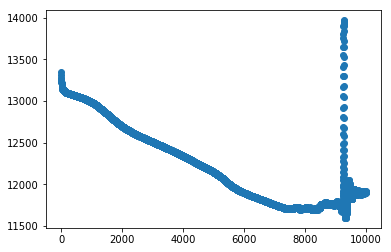

In [14]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8191)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [16]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8191)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

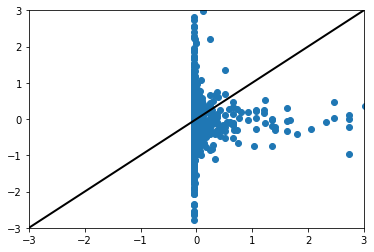

In [17]:
# Plot predictions versus trained data
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [18]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [2]].astype(float)


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [19]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 6:]

valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "BEGIN_DATE_TIME",
                                          "YEAR",
                                          "CZ_NAME"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [20]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 4261.2354
[torch.FloatTensor of size 1]

In [21]:
y_valid_pred

Variable containing:
-7.1308e-01
-4.2902e-02
 1.4056e-01
     ⋮      
-4.1612e-01
 3.7581e-01
-2.3717e+00
[torch.FloatTensor of size 2731x1]

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2731)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [23]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2731)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

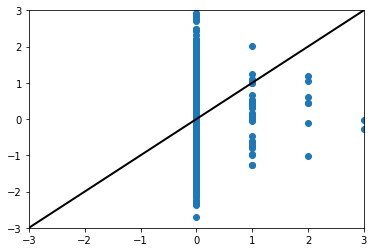

In [24]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 2: Two-Hidden-Layer Neural Network

In [25]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [26]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 1))

In [27]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 3e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print loss
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13328.345703125
1 13309.4912109375
2 13292.9755859375
3 13278.67578125
4 13266.056640625
5 13255.1044921875
6 13245.45703125
7 13237.0546875
8 13229.6259765625
9 13223.109375
10 13217.390625
11 13212.3251953125
12 13207.845703125
13 13203.8642578125
14 13200.3896484375
15 13197.2607421875
16 13194.5107421875
17 13192.0576171875
18 13189.8505859375
19 13187.8486328125
20 13186.06640625
21 13184.505859375
22 13183.00390625
23 13181.7080078125
24 13180.5263671875
25 13179.41796875
26 13178.4345703125
27 13177.482421875
28 13176.6611328125
29 13175.859375
30 13175.1044921875
31 13174.4140625
32 13173.7919921875
33 13173.1591796875
34 13172.5771484375
35 13172.033203125
36 13171.51171875
37 13170.9609375
38 13170.4794921875
39 13170.0322265625
40 13169.5869140625
41 13169.140625
42 13168.716796875
43 13168.3017578125
44 13167.9267578125
45 13167.5673828125
46 13167.1533203125
47 13166.7998046875
48 13166.462890625
49 13166.0751953125
50 13165.73828125
51 13165.388671875
52 13165.057617187

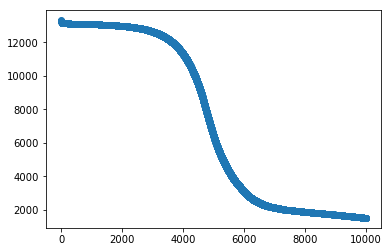

In [28]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [29]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8191)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

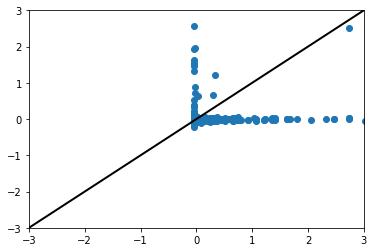

In [30]:
# Plot predictions versus trained data
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [31]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2720.3804
[torch.FloatTensor of size 1]

In [32]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2731)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

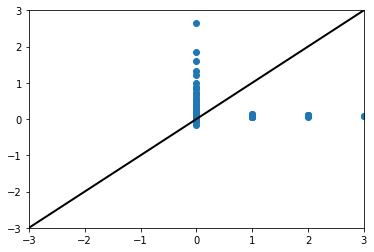

In [33]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 3: Linear Regression

In [34]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [35]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(18, 1))

In [36]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 3e-7


# Train the neural network
for t in range(10000):
    
    # Get current model predictions
    y_pred = model(features_Variable)
    
    # Compute and print loss
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 14474.2861328125
1 14460.4599609375
2 14446.9091796875
3 14433.4990234375
4 14420.21484375
5 14407.158203125
6 14394.21484375
7 14381.4521484375
8 14368.81640625
9 14356.4013671875
10 14344.109375
11 14331.9326171875
12 14319.9091796875
13 14308.05859375
14 14296.333984375
15 14284.736328125
16 14273.30859375
17 14262.052734375
18 14250.888671875
19 14239.8271484375
20 14228.9287109375
21 14218.16015625
22 14207.5234375
23 14196.9951171875
24 14186.5576171875
25 14176.3232421875
26 14166.17578125
27 14156.1142578125
28 14146.20703125
29 14136.416015625
30 14126.7275390625
31 14117.1318359375
32 14107.658203125
33 14098.298828125
34 14089.0654296875
35 14079.9130859375
36 14070.8740234375
37 14061.927734375
38 14053.080078125
39 14044.287109375
40 14035.638671875
41 14027.0927734375
42 14018.642578125
43 14010.2998046875
44 14002.041015625
45 13993.859375
46 13985.7685546875
47 13977.8056640625
48 13969.8876953125
49 13962.083984375
50 13954.345703125
51 13946.6875
52 13939.1005859375

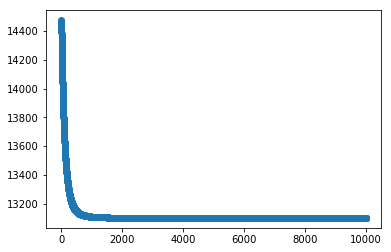

In [37]:
# Plot summed error versus iterations
plt.scatter(iterations, errors)

In [38]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8191)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

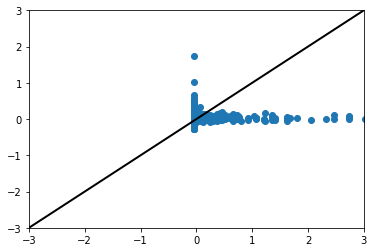

In [39]:
# Plot predictions versus trained data
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [40]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1236.6484
[torch.FloatTensor of size 1]

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2731)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

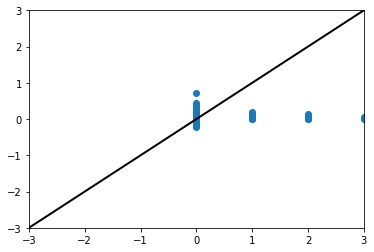

In [42]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)